# Compute performance metrics for the given Y and Y_score from scratch

### Computing Performance metrics for the dataset in which positive positive points >> number of negative points

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_a=pd.read_csv('/content/drive/MyDrive/aaic/5_a.csv')
df_a

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
...,...,...
10095,1.0,0.665371
10096,1.0,0.607961
10097,1.0,0.777724
10098,1.0,0.846036


In [5]:
import numpy as np

In [6]:
df_a['y_proba']=0
def ap(df):
  if df['proba']>0.5:
    return 1
  else:
    return 0  
df_a['y_proba']=df_a.apply(ap,axis=1)

In [7]:
#added a column with y_proba which says wheather the output is o or 1 given threshold =0.5
df_a

,y,proba,y_proba
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1
...,...,...,...
10095,1.0,0.665371,1
10096,1.0,0.607961,1
10097,1.0,0.777724,1
10098,1.0,0.846036,1


In [8]:
def confusion_matrix(df_a):
  cm=np.empty(shape=(2,2))
  #True positive 
  cm[1][1]=len(df_a[(df_a['y']==1) & (df_a['y_proba']==1)])
  #True Negative
  cm[0][0]=len(df_a[(df_a['y']==0) & (df_a['y_proba']==0)])
  #False Positive
  cm[0][1]=len(df_a[(df_a['y']==1) & (df_a['y_proba']==0)])
  #False Negative
  cm[1][0]=len(df_a[(df_a['y']==0) & (df_a['y_proba']==1)])
  return cm

In [9]:
#confusion matrix 
cm=confusion_matrix(df_a)

In [10]:
cm

array([[    0.,     0.],
       [  100., 10000.]])

In [11]:
def F1_score(cm):
  return((cm[1][1])/(cm[1][1]+0.5*(cm[1][0]+cm[0][1])))

In [12]:
#F1 score 
print("F1 score is : " ,end='')
print(F1_score(cm))

F1 score is : 0.9950248756218906


In [13]:
from tqdm.notebook import tqdm

In [14]:
df_a['proba']

0        0.637387
1        0.635165
2        0.766586
3        0.724564
4        0.889199
           ...   
10095    0.665371
10096    0.607961
10097    0.777724
10098    0.846036
10099    0.679507
Name: proba, Length: 10100, dtype: float64

In [15]:
cm

array([[    0.,     0.],
       [  100., 10000.]])

In [16]:
def roc(df_a):
  uuu=sorted(list(set(df_a['proba'])),reverse=True)
  tpr_list=[]
  fpr_list=[]
  #no_of_points=len(df_a)
  for i in tqdm(range(len(uuu))):
    thre=uuu[i]
    def ap(df):
      if df['proba']>=thre:
        return 1
      else:
        return 0  
    df_a['y_proba']=df_a.apply(ap,axis=1)
    cm=confusion_matrix(df_a)
    no_of_p_points=cm[0][1]+cm[1][1]
    no_of_n_points=cm[0][0]+cm[1][0]
    tpr=cm[1][1]/no_of_p_points
    fpr=cm[1][0]/no_of_n_points
    tpr_list.append(tpr)
    fpr_list.append(fpr)
  return tpr_list,fpr_list

In [17]:
tpr,fpr=roc(df_a)

  0%|          | 0/10100 [00:00<?, ?it/s]

In [18]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


Text(0.5, 1.0, 'ROC CURVE')

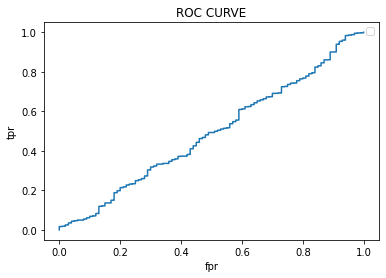

In [19]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC CURVE')

In [20]:
pd.DataFrame({'tpr':tpr,'fpr':fpr})

,tpr,fpr
0,0.0001,0.0
1,0.0002,0.0
2,0.0003,0.0
3,0.0004,0.0
4,0.0005,0.0
...,...,...
10095,0.9996,1.0
10096,0.9997,1.0
10097,0.9998,1.0
10098,0.9999,1.0


In [21]:
#auc 
print('AUC is ',np.trapz(tpr,fpr))

AUC is  0.48829900000000004


In [22]:
#accuracy is 
print('accuracy is : ',end='')
len(df_a[df_a['y']==df_a['y_proba']])/len(df_a)

accuracy is : 

0.9900990099009901

## Computing Performance metrics for the dataset in which positive positive points << number of negative points

In [23]:
df_b=pd.read_csv('/content/drive/MyDrive/aaic/5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [24]:
df_b['y_proba']=0
def ap(df):
  if df['proba']>0.5:
    return 1
  else:
    return 0  
df_b['y_proba']=df_b.apply(ap,axis=1)

In [25]:
cm=confusion_matrix(df_b)

In [26]:
cm

array([[9761.,   45.],
       [ 239.,   55.]])

In [27]:
def roc(df_a):
  uuu=sorted(list(set(df_a['proba'])),reverse=True)
  tpr_list=[]
  fpr_list=[]
  #no_of_points=len(df_a)
  for i in tqdm(range(len(uuu))):
    thre=uuu[i]
    def ap(df):
      if df['proba']>=thre:
        return 1
      else:
        return 0  
    df_a['y_proba']=df_a.apply(ap,axis=1)
    cm=confusion_matrix(df_a)
    no_of_p_points=cm[0][1]+cm[1][1]
    no_of_n_points=cm[0][0]+cm[1][0]
    tpr=cm[1][1]/no_of_p_points
    fpr=cm[1][0]/no_of_n_points
    tpr_list.append(tpr)
    fpr_list.append(fpr)
  return tpr_list,fpr_list

In [28]:
tpr,fpr=roc(df_b)

  0%|          | 0/10100 [00:00<?, ?it/s]

In [29]:
F1_score(cm)

0.27918781725888325

In [30]:
pd.DataFrame({'tpr':tpr,'fpr':fpr})

,tpr,fpr
0,0.01,0.0000
1,0.02,0.0000
2,0.03,0.0000
3,0.04,0.0000
4,0.05,0.0000
...,...,...
10095,1.00,0.9996
10096,1.00,0.9997
10097,1.00,0.9998
10098,1.00,0.9999


In [31]:
#auc 
print('AUC is ',np.trapz(tpr,fpr))

AUC is  0.9377570000000001


In [32]:
#accuracy is 
print('accuracy is : ',end='')
len(df_a[df_a['y']==df_a['y_proba']])/len(df_a)

accuracy is : 

0.9900990099009901

No handles with labels found to put in legend.


Text(0.5, 1.0, 'ROC CURVE')

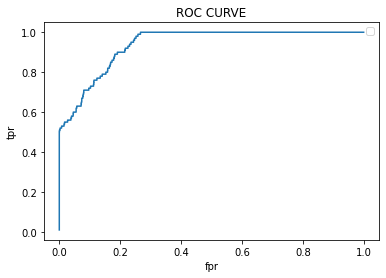

In [33]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC CURVE')

### computing best threshold of probablity which gi

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [34]:
df_c=pd.read_csv('/content/drive/MyDrive/aaic/5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [35]:
df_c['y_proba']=0
def ap(df):
  if df['prob']>0.5:
    return 1
  else:
    return 0  
df_c['y_proba']=df_c.apply(ap,axis=1)
def roc(df_a):
  uuu=sorted(list(set(df_a['prob'])),reverse=True)
  tpr_list=[]
  fpr_list=[]
  aaa=[]
  ttt=[]
  #no_of_points=len(df_a)
  for i in tqdm(range(len(uuu))):
    thre=uuu[i]
    def ap(df):
      if df['prob']>=thre:
        return 1
      else:
        return 0  
    df_a['y_proba']=df_a.apply(ap,axis=1)
    cm=confusion_matrix(df_a)
    no_of_points=cm[1][1]+cm[0][1]
    tpr=cm[1][1]/no_of_points
    fpr=cm[1][0]/no_of_points
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    aaa.append(500*cm[0][1]+100*cm[1][0])
    ttt.append(uuu[i])
  return tpr_list,fpr_list,aaa,ttt

In [36]:
tpr,fpr,aaa,ttt=roc(df_c)

  0%|          | 0/2791 [00:00<?, ?it/s]

In [37]:
# minimum A value 
min(aaa)

141000.0

In [38]:
#threshold value satisfying minimum A value
ttt[aaa.index(min(aaa))]

0.2300390278970873

### Computing Performance metrics for Regrssion 

In [39]:
df_d=pd.read_csv('/content/drive/MyDrive/aaic/5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [40]:
#mean squared error
((df_d['y']-df_d['pred'])**2).sum()/len(df_d['y'])

177.16569974554707

In [41]:
#modified mean absolute percentage error 
# modified MAPE to avoid zero division error 
# taken mean of actual values instead of actual values to avoid zero division error
(1/len(df_d['y']))*(abs((df_d['y']-df_d['pred']))/(df_d['y']).mean()).sum()

0.12912029940096867

In [42]:
#r^2 
1-((df_d['y']-df_d['pred'])**2).sum()/((df_d['y']-df_d['y'].mean())**2).sum()

0.9563582786990937